In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
crime = pd.read_csv('csv/crime.csv')
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [4]:
# REPORTED_DATE 컬럼을 datetime 형식으로 변환
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

# 상위 10개 범죄 알아보기
- traffic accident가 가장 많다.

OFFENSE_TYPE_ID
traffic-accident                87420
traffic-accident-hit-and-run    33514
theft-items-from-vehicle        27468
traf-other                      25793
theft-of-motor-vehicle          23004
theft-other                     19216
criminal-mischief-mtr-veh       15877
theft-shoplift                  12896
criminal-mischief-other         12772
assault-simple                  11801
Name: count, dtype: int64


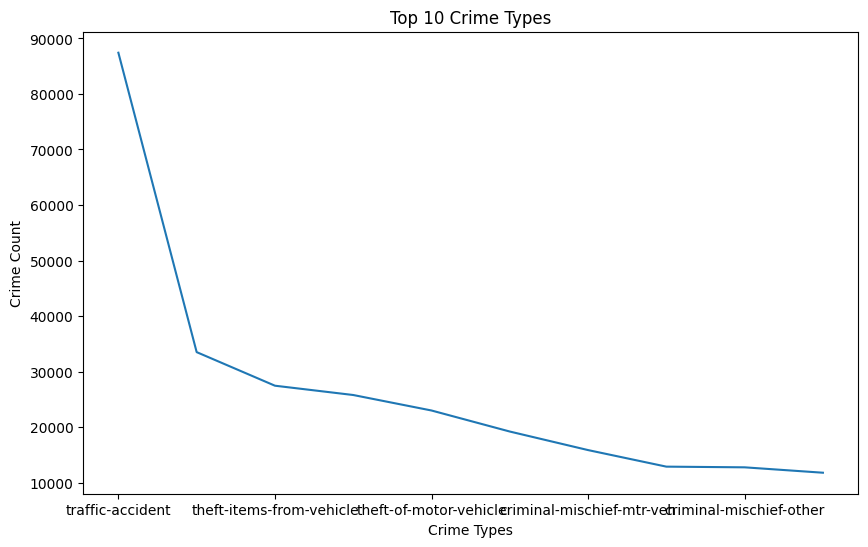

In [5]:
# 'OFFENSE_TYPE_ID'를 기준으로 범죄 건수 집계
crime_counts = crime['OFFENSE_TYPE_ID'].value_counts()

# 상위 10개 범죄 유형 출력
top_10_crimes = crime_counts.head(10)
print(top_10_crimes)

# 상위 10개 범죄 유형 시계열 그래프
plt.figure(figsize=(10, 6))
top_10_crimes.plot(kind='line')
plt.xlabel('Crime Types')
plt.ylabel('Crime Count')
plt.title('Top 10 Crime Types')
plt.show()

# 요일별 범죄 건수 확인하기
- 월요일에 범죄가 가장 많이 일어난다.

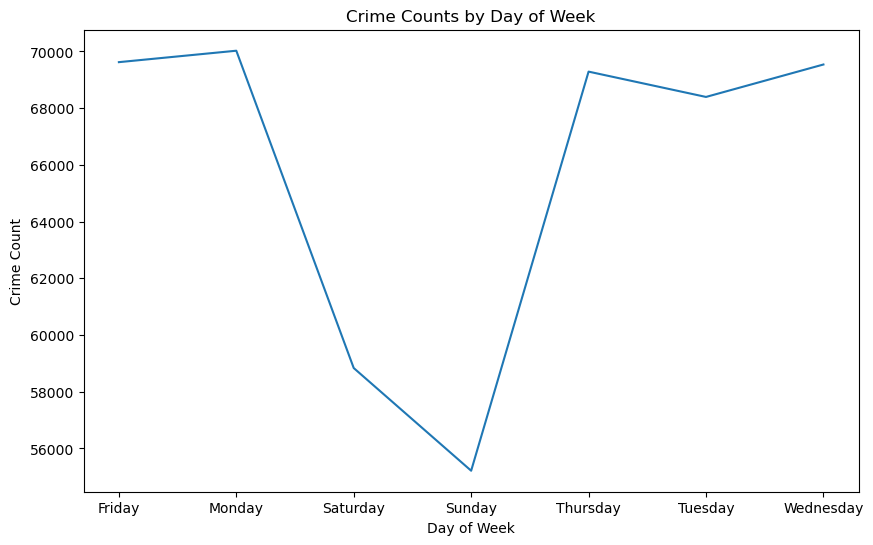

In [18]:
# 요일별 범죄 건수 집계
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])
crime['DAY_OF_WEEK'] = crime['REPORTED_DATE'].dt.day_name()
day_of_week_crime_counts = crime.groupby('DAY_OF_WEEK')['OFFENSE_TYPE_ID'].count()

# 요일별 범죄 건수 시계열 그래프
plt.figure(figsize=(10, 6))
day_of_week_crime_counts.plot(kind='line')
plt.xlabel('Day of Week')
plt.ylabel('Crime Count')
plt.title('Crime Counts by Day of Week')
plt.show()

# 지역 별 범죄 건수 확인하기
- 2016년에 montbello에서 눈에 띄게 많은 범죄가 일어났다.
- 일반적으로는, five-points, cbd와 stapleton에서 많은 범죄가 일어난다.

NEIGHBORHOOD_ID
five-points      23466
stapleton        18024
cbd              17466
capitol-hill     15619
montbello        15213
baker            13263
lincoln-park     12624
westwood         12115
east-colfax      11924
union-station    10251
Name: OFFENSE_TYPE_ID, dtype: int64


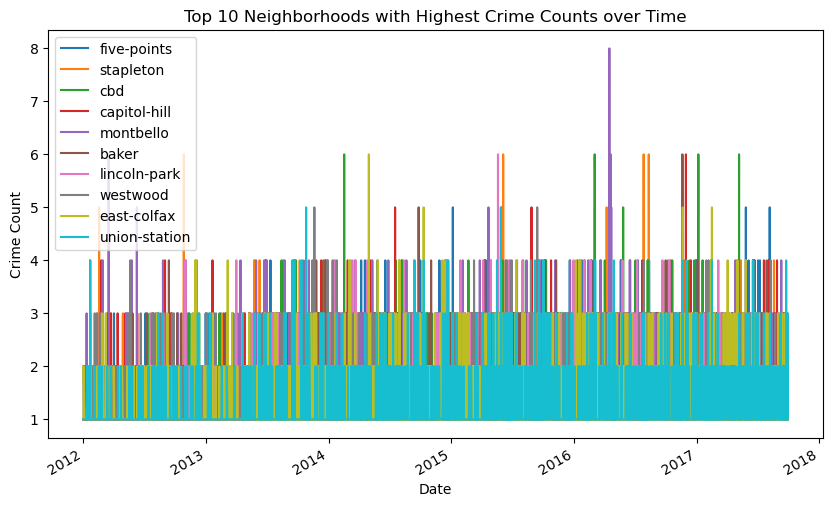

In [19]:
# 'NEIGHBORHOOD_ID'를 기준으로 범죄 건수 집계
neighborhood_crime_counts = crime.groupby('NEIGHBORHOOD_ID')['OFFENSE_TYPE_ID'].count()

# 상위 10개 지역 출력
top_10_neighborhoods = neighborhood_crime_counts.sort_values(ascending=False).head(10)
print(top_10_neighborhoods)

# 상위 10개 지역의 범죄 건수 시계열 그래프
plt.figure(figsize=(10, 6))
for neighborhood in top_10_neighborhoods.index:
    crime_by_neighborhood = crime[crime['NEIGHBORHOOD_ID'] == neighborhood]
    crime_by_neighborhood['REPORTED_DATE'].value_counts().sort_index().plot(label=neighborhood)

plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Top 10 Neighborhoods with Highest Crime Counts over Time')
plt.legend()
plt.show()


# 월별 범죄 건수 확인하기
- 8월에 범죄 건수가 가장 많다.

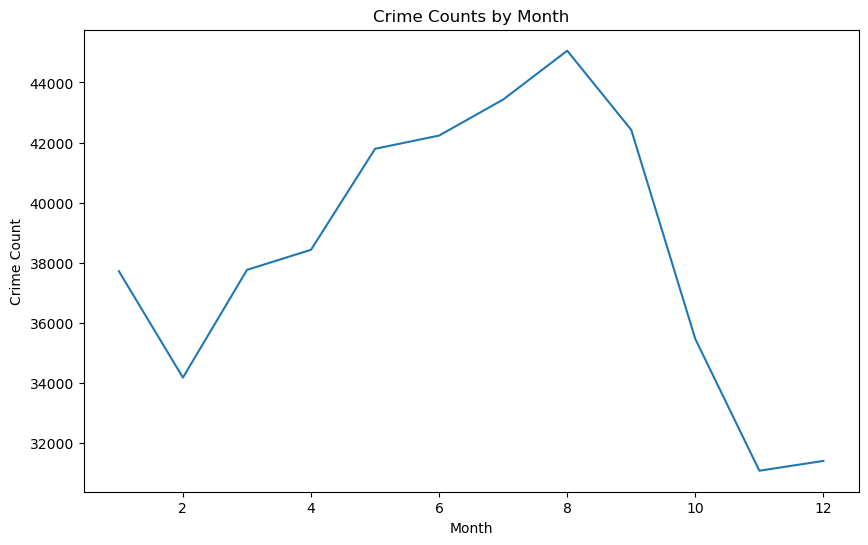

In [15]:
# 월별 범죄 건수 집계
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])
crime['MONTH'] = crime['REPORTED_DATE'].dt.month
month_crime_counts = crime.groupby('MONTH')['OFFENSE_TYPE_ID'].count()

# 월별 범죄 건수 시계열 그래프
plt.figure(figsize=(10, 6))
month_crime_counts.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Crime Counts by Month')
plt.show()